In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/merged_data.csv')
data.info()

C:\Users\BIMBARA\AppData\Local\Temp\ipykernel_25428\1736518648.py:6: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/selected_data/merged_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Index                217242 non-null  int64  
 1   batter               217242 non-null  object 
 2   bowler               217242 non-null  object 
 3   non_striker          217242 non-null  object 
 4   runs_by_bat          217242 non-null  int64  
 5   extra_runs           217242 non-null  int64  
 6   total_runs_delivery  217242 non-null  int64  
 7   current_team_total   217242 non-null  int64  
 8   runs_remain          103118 non-null  float64
 9   batter_runs          217242 non-null  int64  
 10  balls_faced          217242 non-null  int64  
 11  wickets_fallen       217242 non-null  int64  
 12  extra_type           217242 non-null  object 
 13  delivery             217242 non-null  float64
 14  over                 217242 non-null  int64  
 15  wicket_type      

In [3]:
inning_boundaries_indices = data[data['Index'] == 0].index
print("Inning Boundaries Indices:")
print(inning_boundaries_indices)

Inning Boundaries Indices:
Index([     0,    125,    250,    373,    497,    622,    737,    866,    990,
         1072,
       ...
       216106, 216225, 216345, 216463, 216584, 216677, 216760, 216883, 217006,
       217116],
      dtype='int64', length=1896)


In [22]:
import pandas as pd

# Create an empty DataFrame to store the results
max_runs_balls_df = pd.DataFrame(columns=['Match_ID', 'Inning', 'Index', 'Batter', 'Max_Runs', 'Max_Balls_Faced', 'Batting_Team'])

# Get the indices marking the boundaries of each inning
inning_boundaries_indices = data[data['Index'] == 0].index

# Iterate through each match
for match_id, match_group in data.groupby('match_id'):
    # Iterate through each inning
    for idx, inning_idx in enumerate(inning_boundaries_indices, start=1):
        # Extract the inning data
        if idx < len(inning_boundaries_indices):
            inning = match_group.iloc[inning_idx:inning_boundaries_indices[idx]]
        else:
            inning = match_group.iloc[inning_idx:]

        # Check if the inning DataFrame is empty
        if inning.empty:
            continue

        # Calculate maximum runs and balls faced per batter
        max_runs_per_batter = inning.groupby('batter')['batter_runs'].max()
        max_balls_faced_per_batter = inning.groupby('batter')['balls_faced'].max()

        # Extract the batting team name
        batting_team = inning['batting_team'].iloc[0]  # Assuming the batting team name is the same for all rows in the inning

        # Combine the maximum runs, balls faced, and batting team for each batter
        inning_data = pd.DataFrame({
            'Match_ID': match_id,
            'Inning': idx,
            'Index': inning['Index'].values[0],  # Accessing the first index value in the inning
            'Batter': max_runs_per_batter.index,
            'Max_Runs': max_runs_per_batter.values,
            'Max_Balls_Faced': max_balls_faced_per_batter.values,
            'Batting_Team': batting_team
        })

        # Append the inning data to the main DataFrame
        max_runs_balls_df = pd.concat([max_runs_balls_df, inning_data])

# Reset index of the DataFrame
max_runs_balls_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(max_runs_balls_df)


                                Match_ID Inning Index             Batter  \
0      Afghanistan_Bangladesh_2018-06-03      1     0   Asghar Stanikzai   
1      Afghanistan_Bangladesh_2018-06-03      1     0        Karim Janat   
2      Afghanistan_Bangladesh_2018-06-03      1     0      Mohammad Nabi   
3      Afghanistan_Bangladesh_2018-06-03      1     0   Mohammad Shahzad   
4      Afghanistan_Bangladesh_2018-06-03      1     0  Najibullah Zadran   
...                                  ...    ...   ...                ...   
16092      Zimbabwe_Sri Lanka_2024-01-18      2    60          C Madande   
16093      Zimbabwe_Sri Lanka_2024-01-18      2    60          LM Jongwe   
16094      Zimbabwe_Sri Lanka_2024-01-18      2    60          R Ngarava   
16095      Zimbabwe_Sri Lanka_2024-01-18      2    60        SC Williams   
16096      Zimbabwe_Sri Lanka_2024-01-18      2    60       WP Masakadza   

      Max_Runs Max_Balls_Faced Batting_Team  
0           25              24  Afghanist

In [23]:
# Add a column for strike rate to the DataFrame
strike_rate = []
for max_runs, max_balls_faced in zip(max_runs_balls_df['Max_Runs'], max_runs_balls_df['Max_Balls_Faced']):
    try:
        strike_rate.append((max_runs / max_balls_faced) * 100)
    except ZeroDivisionError:
        strike_rate.append(np.nan)

max_runs_balls_df['Strike_Rate'] = strike_rate

# Display the updated DataFrame
print(max_runs_balls_df)

                                Match_ID Inning Index             Batter  \
0      Afghanistan_Bangladesh_2018-06-03      1     0   Asghar Stanikzai   
1      Afghanistan_Bangladesh_2018-06-03      1     0        Karim Janat   
2      Afghanistan_Bangladesh_2018-06-03      1     0      Mohammad Nabi   
3      Afghanistan_Bangladesh_2018-06-03      1     0   Mohammad Shahzad   
4      Afghanistan_Bangladesh_2018-06-03      1     0  Najibullah Zadran   
...                                  ...    ...   ...                ...   
16092      Zimbabwe_Sri Lanka_2024-01-18      2    60          C Madande   
16093      Zimbabwe_Sri Lanka_2024-01-18      2    60          LM Jongwe   
16094      Zimbabwe_Sri Lanka_2024-01-18      2    60          R Ngarava   
16095      Zimbabwe_Sri Lanka_2024-01-18      2    60        SC Williams   
16096      Zimbabwe_Sri Lanka_2024-01-18      2    60       WP Masakadza   

      Max_Runs Max_Balls_Faced Batting_Team  Strike_Rate  
0           25              

In [33]:
# Group by 'Batting_Team' and 'Batter' and find the maximum strike rate for each batter
best_strike_rates = max_runs_balls_df.groupby(['Batting_Team', 'Batter'])['Strike_Rate'].max().reset_index()

# Display the new DataFrame
print(best_strike_rates)

     Batting_Team             Batter  Strike_Rate
0     Afghanistan        A Balbirnie   300.000000
1     Afghanistan           A Ndlovu    64.705882
2     Afghanistan         AD Mathews   100.000000
3     Afghanistan  Abdullah Shafique     0.000000
4     Afghanistan       Afif Hossain   200.000000
...           ...                ...          ...
2257     Zimbabwe    TS Kamunhukamwe   144.444444
2258     Zimbabwe          V Sibanda   133.333333
2259     Zimbabwe         VM Nyauchi    33.333333
2260     Zimbabwe        W Madhevere   216.666667
2261     Zimbabwe       WP Masakadza   137.500000

[2262 rows x 3 columns]


In [34]:
# Sort the DataFrame by 'Batting_Team' and 'Strike_Rate' in descending order
sorted_strike_rates = best_strike_rates.sort_values(by=['Batting_Team', 'Strike_Rate'], ascending=[True, False])

# Group the sorted DataFrame by 'Batting_Team' and create a list of batters in descending order of strike rate for each team
team_batting_orders = sorted_strike_rates.groupby('Batting_Team')['Batter'].apply(list)

# Display the batting order for each team
for team, batting_order in team_batting_orders.items():
    print(f"Team: {team}")
    print(f"Batting Order: {batting_order}")
    print()


Team: Afghanistan
Batting Order: ['BRM Taylor', 'HT Tector', 'P Nissanka', 'Asif Ali', 'Shafiqullah', 'Mohammad Nabi', 'Ijaz Ahmad Ahmadzai', 'Gulbadin Naib', 'Rashid Khan', 'A Balbirnie', 'Hazratullah', 'Najibullah Zadran', 'C Karunaratne', 'Rahmanullah Gurbaz', 'Sharafuddin Ashraf', 'Mujeeb Ur Rahman', 'SC Williams', 'PR Stirling', 'PBB Rajapaksa', 'Azmatullah Omarzai', 'GJ Delany', 'Liton Das', 'Mustafizur Rahman', 'PWH de Silva', 'Asghar Stanikzai', 'Afif Hossain', 'F Hand', 'Karim Janat', 'Mohammad Ishaq', 'PJ Moor', 'Samiullah Shenwari', 'Tayyab Tahir', 'YBK Jaiswal', 'S Dube', 'Sikandar Raza', "KJ O'Brien", 'BKG Mendis', 'Mohammad Shahzad', 'V Kohli', 'GH Dockrell', 'L Croospulle', 'SF Mire', 'Qais Ahmad', 'W Madhevere', 'DT Tiripano', 'Fareed Ahmad', 'Ariful Haque', 'Mushfiqur Rahim', 'E Lewis', 'MD Gunathilaka', 'Shahidullah', 'Ibrahim Zadran', 'DM de Silva', 'Saim Ayub', 'Usman Ghani', 'KL Rahul', 'MD Shanaka', 'Noor Ahmad', 'R Mutumbami', 'SC Getkate', 'SE Rutherford', 'SW P

In [38]:
import pandas as pd
import numpy as np

# Function to create batting order
def create_batting_order(players):
    batting_order = []
    
    # Opening with High Strike Rates
    if len(players) >= 2:
        batting_order.extend(players[:2])
        players = players[2:]

    # 3rd Position - Best Batsman
    if players:
        batting_order.append(players[0])
        players = players[1:]

    # 4th Position - Average Strike Rate
    if players:
        median_index = len(players) // 2
        batting_order.append(players[median_index])
        players.pop(median_index)

    # 5th Position - Higher Rate than 4th
    if players:
        batting_order.append(players[0])
        players = players[1:]

    # 6th, 7th, 8th - All-Rounders
    if len(players) >= 3:
        batting_order.extend(players[:3])
        players = players[3:]

    # Others
    batting_order.extend(players)

    return batting_order

# Sort the DataFrame by 'Batting_Team' and 'Strike_Rate' in descending order
sorted_strike_rates = best_strike_rates.sort_values(by=['Batting_Team', 'Strike_Rate'], ascending=[True, False])

# Group the sorted DataFrame by 'Batting_Team' and create a list of batters in descending order of strike rate for each team
team_batting_orders = sorted_strike_rates.groupby('Batting_Team')['Batter'].apply(list)

# Create an empty DataFrame to store the batting order
batting_order_df = pd.DataFrame(columns=['Team', 'Batting Order'])

# Iterate over each team
for team, players in team_batting_orders.items():
    # Create batting order for the team
    batting_order = create_batting_order(players)
    
    # Append the batting order to the DataFrame
    batting_order_df = pd.concat([batting_order_df, pd.DataFrame({'Team': [team], 'Batting Order': [batting_order]})], ignore_index=True)

# Display the batting order for each team
print(batting_order_df)


            Team                                      Batting Order
0    Afghanistan  [BRM Taylor, HT Tector, P Nissanka, Simi Singh...
1      Australia  [AD Russell, KD Karthik, PM Nevill, BRM Taylor...
2     Bangladesh  [JJ Roy, M Mosehle, MS Dhoni, TWM Latham, Mehe...
3        England  [BA Stokes, CJ Jordan, MM Ali, MS Dhoni, RG Sh...
4          India  [HH Pandya, MS Dhoni, Yuvraj Singh, P Nissanka...
5        Ireland  [KJ O'Brien, BJ McCarthy, PR Stirling, WK McCa...
6    New Zealand  [LRPL Taylor, MJ McClenaghan, MJ Santner, AD M...
7       Pakistan  [Faheem Ashraf, CAK Walton, Haider Ali, KC San...
8   South Africa  [M Mosehle, JA Morkel, DA Miller, JN Malan, BC...
9      Sri Lanka  [KIC Asalanka, AM Fernando, I Udana, LMP Simmo...
10   West Indies  [CH Gayle, DR Smith, KA Pollard, LM Jongwe, LM...
11      Zimbabwe  [LM Jongwe, PJ Moor, C Madande, DT Tiripano, E...


In [39]:
import numpy as np

def simulate_match(batting_order):
    # Assume a simple model where each player has a probability of scoring runs
    team_score = np.random.randint(100, 300)  # Simulate team score
    
    return team_score

# Simulate matches for each batting order
results = {}
for team, batting_order in batting_order_df.iterrows():
    team_name = batting_order['Team']
    batting_order = batting_order['Batting Order']
    
    # Simulate multiple matches
    match_results = [simulate_match(batting_order) for _ in range(1000)]
    
    # Calculate win probability
    win_probability = sum(result > 200 for result in match_results) / len(match_results)
    
    # Store results
    results[team_name] = {
        'Win Probability': win_probability,
        'Average Score': np.mean(match_results)
    }

# Print results
for team, result in results.items():
    print(f"Team: {team}")
    print(f"Win Probability: {result['Win Probability']:.2f}")
    print(f"Average Score: {result['Average Score']:.2f}")
    print()


Team: Afghanistan
Win Probability: 0.50
Average Score: 199.78

Team: Australia
Win Probability: 0.49
Average Score: 197.24

Team: Bangladesh
Win Probability: 0.50
Average Score: 200.04

Team: England
Win Probability: 0.54
Average Score: 201.34

Team: India
Win Probability: 0.51
Average Score: 200.17

Team: Ireland
Win Probability: 0.48
Average Score: 200.32

Team: New Zealand
Win Probability: 0.51
Average Score: 200.28

Team: Pakistan
Win Probability: 0.49
Average Score: 198.85

Team: South Africa
Win Probability: 0.49
Average Score: 198.66

Team: Sri Lanka
Win Probability: 0.49
Average Score: 198.94

Team: West Indies
Win Probability: 0.52
Average Score: 201.44

Team: Zimbabwe
Win Probability: 0.49
Average Score: 198.19



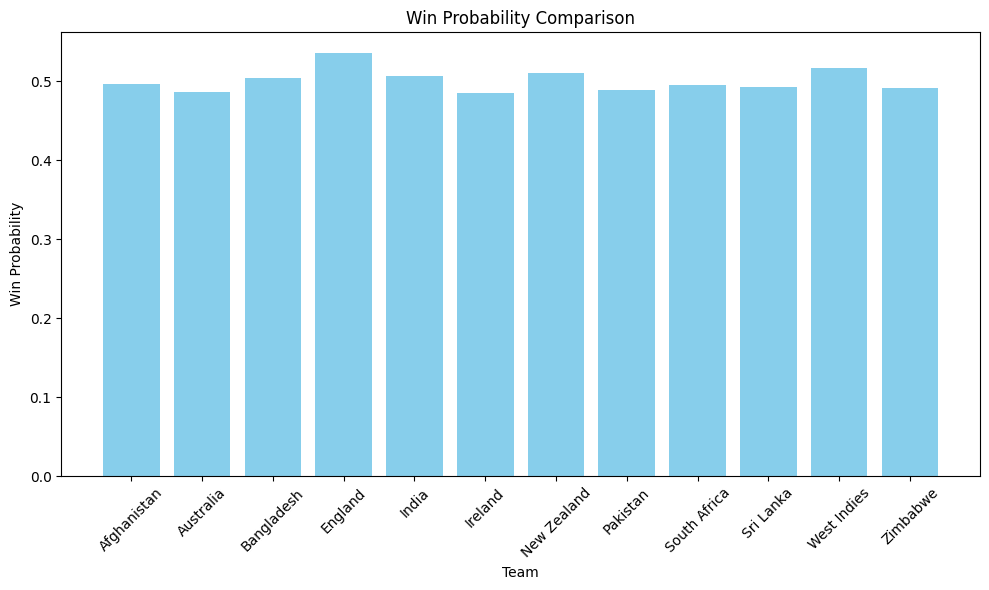

AttributeError: 'list' object has no attribute 'items'

<Figure size 1000x600 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt

# Win Probability Comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [result['Win Probability'] for result in results.values()], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Win Probability')
plt.title('Win Probability Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram of Match Scores
plt.figure(figsize=(10, 6))
for team, match_results in match_results.items():
    plt.hist(match_results, bins=20, alpha=0.5, label=team)
plt.xlabel('Match Score')
plt.ylabel('Frequency')
plt.title('Histogram of Match Scores')
plt.legend()
plt.tight_layout()
plt.show()

# Box Plot of Match Scores
plt.figure(figsize=(10, 6))
plt.boxplot([match_results for match_results in match_results.values()], labels=match_results.keys())
plt.xlabel('Team')
plt.ylabel('Match Score')
plt.title('Box Plot of Match Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cumulative Distribution Function (CDF)
plt.figure(figsize=(10, 6))
for team, match_results in match_results.items():
    plt.hist(match_results, bins=20, cumulative=True, density=True, histtype='step', label=team)
plt.xlabel('Match Score')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Match Scores')
plt.legend()
plt.tight_layout()
plt.show()

# Scatter Plot of Win Probability vs. Average Score
plt.figure(figsize=(10, 6))
plt.scatter([result['Average Score'] for result in results.values()], 
            [result['Win Probability'] for result in results.values()], color='coral')
plt.xlabel('Average Score')
plt.ylabel('Win Probability')
plt.title('Win Probability vs. Average Score')
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd

# Load the ball-by-ball data
ball_by_ball_file_path = '../Data/selected_data/merged_data.csv'
ball_by_ball_df = pd.read_csv(ball_by_ball_file_path)

# Display column names
print(ball_by_ball_df.columns)


C:\Users\BIMBARA\AppData\Local\Temp\ipykernel_25428\3385713119.py:5: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  ball_by_ball_df = pd.read_csv(ball_by_ball_file_path)


Index(['Index', 'batter', 'bowler', 'non_striker', 'runs_by_bat', 'extra_runs',
       'total_runs_delivery', 'current_team_total', 'runs_remain',
       'batter_runs', 'balls_faced', 'wickets_fallen', 'extra_type',
       'delivery', 'over', 'wicket_type', 'player_out', 'fielder',
       'toss_decision', 'toss_winner', 'innings', 'venue', 'year', 'month',
       'match_id', 'winning_team', 'batting_team', 'bowling_team', 'won',
       'final_team_total', 'batter_type', 'non_striker_type', 'bowler_type',
       'replacements', 'review'],
      dtype='object')


In [44]:
import pandas as pd

# Load the ball-by-ball data
ball_by_ball_file_path = '../Data/selected_data/merged_data.csv'
ball_by_ball_df = pd.read_csv(ball_by_ball_file_path)

# Display column names to confirm
print(ball_by_ball_df.columns)

print(batting_order_df)

# Function to extract the actual batting order from ball-by-ball data
def get_actual_batting_order(df, team_name):
    team_df = df[df['batting_team'] == team_name]  # Adjusted column name
    actual_order = team_df.drop_duplicates(subset='batter', keep='first')  # Adjusted column name
    actual_order = actual_order.sort_values(by=['over', 'delivery'])  # Adjusted column names
    return actual_order['batter'].tolist()  # Adjusted column name

# Calculate the accuracy for each team
accuracy_results = []

for index, row in batting_order_df.iterrows():
    team_name = row['Team']
    generated_order = row['Batting Order']
    
    actual_order = get_actual_batting_order(ball_by_ball_df, team_name)
    
    # Calculate accuracy: percentage of correct positions
    min_length = min(len(actual_order), len(generated_order))
    correct_count = sum([1 for i in range(min_length) if actual_order[i] == generated_order[i]])
    accuracy = correct_count / min_length * 100 if min_length > 0 else 0
    
    accuracy_results.append({'Team': team_name, 'Accuracy': accuracy})

# Create a DataFrame to display accuracy results
accuracy_df = pd.DataFrame(accuracy_results)
print(accuracy_df)



C:\Users\BIMBARA\AppData\Local\Temp\ipykernel_25428\1944008680.py:5: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  ball_by_ball_df = pd.read_csv(ball_by_ball_file_path)


Index(['Index', 'batter', 'bowler', 'non_striker', 'runs_by_bat', 'extra_runs',
       'total_runs_delivery', 'current_team_total', 'runs_remain',
       'batter_runs', 'balls_faced', 'wickets_fallen', 'extra_type',
       'delivery', 'over', 'wicket_type', 'player_out', 'fielder',
       'toss_decision', 'toss_winner', 'innings', 'venue', 'year', 'month',
       'match_id', 'winning_team', 'batting_team', 'bowling_team', 'won',
       'final_team_total', 'batter_type', 'non_striker_type', 'bowler_type',
       'replacements', 'review'],
      dtype='object')
            Team                                      Batting Order
0    Afghanistan  [BRM Taylor, HT Tector, P Nissanka, Simi Singh...
1      Australia  [AD Russell, KD Karthik, PM Nevill, BRM Taylor...
2     Bangladesh  [JJ Roy, M Mosehle, MS Dhoni, TWM Latham, Mehe...
3        England  [BA Stokes, CJ Jordan, MM Ali, MS Dhoni, RG Sh...
4          India  [HH Pandya, MS Dhoni, Yuvraj Singh, P Nissanka...
5        Ireland  [KJ O'Br

C:\Users\BIMBARA\AppData\Local\Temp\ipykernel_25428\2704898760.py:7: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  ball_by_ball_df = pd.read_csv(ball_by_ball_file_path)


Index(['Index', 'batter', 'bowler', 'non_striker', 'runs_by_bat', 'extra_runs',
       'total_runs_delivery', 'current_team_total', 'runs_remain',
       'batter_runs', 'balls_faced', 'wickets_fallen', 'extra_type',
       'delivery', 'over', 'wicket_type', 'player_out', 'fielder',
       'toss_decision', 'toss_winner', 'innings', 'venue', 'year', 'month',
       'match_id', 'winning_team', 'batting_team', 'bowling_team', 'won',
       'final_team_total', 'batter_type', 'non_striker_type', 'bowler_type',
       'replacements', 'review'],
      dtype='object')
            Team                                      Batting Order
0    Afghanistan  [BRM Taylor, HT Tector, P Nissanka, Simi Singh...
1      Australia  [AD Russell, KD Karthik, PM Nevill, BRM Taylor...
2     Bangladesh  [JJ Roy, M Mosehle, MS Dhoni, TWM Latham, Mehe...
3        England  [BA Stokes, CJ Jordan, MM Ali, MS Dhoni, RG Sh...
4          India  [HH Pandya, MS Dhoni, Yuvraj Singh, P Nissanka...
5        Ireland  [KJ O'Br

C:\Users\BIMBARA\AppData\Local\Temp\ipykernel_25428\2704898760.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x='Team', y='Accuracy', palette='viridis')


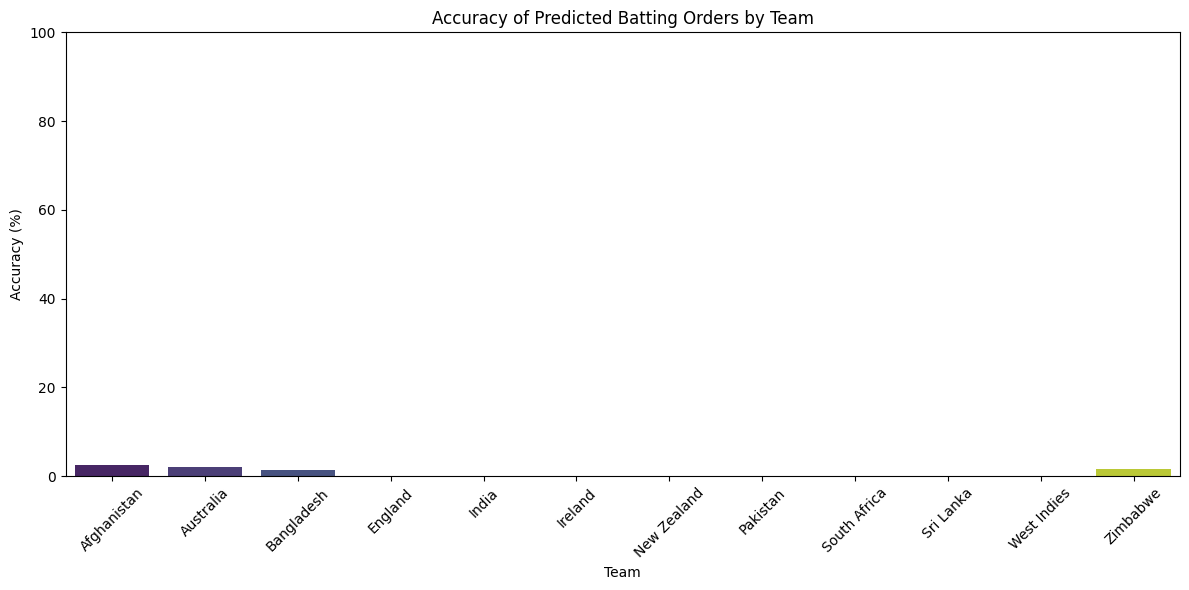

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ball-by-ball data
ball_by_ball_file_path = '../Data/selected_data/merged_data.csv'
ball_by_ball_df = pd.read_csv(ball_by_ball_file_path)

# Display column names to confirm
print(ball_by_ball_df.columns)

print(batting_order_df)

# Function to extract the actual batting order from ball-by-ball data
def get_actual_batting_order(df, team_name):
    team_df = df[df['batting_team'] == team_name]  # Adjusted column name
    actual_order = team_df.drop_duplicates(subset='batter', keep='first')  # Adjusted column name
    actual_order = actual_order.sort_values(by=['over', 'delivery'])  # Adjusted column names
    return actual_order['batter'].tolist()  # Adjusted column name

# Calculate the accuracy for each team
accuracy_results = []

for index, row in batting_order_df.iterrows():
    team_name = row['Team']
    generated_order = row['Batting Order']
    
    actual_order = get_actual_batting_order(ball_by_ball_df, team_name)
    
    # Calculate accuracy: percentage of correct positions
    min_length = min(len(actual_order), len(generated_order))
    correct_count = sum([1 for i in range(min_length) if actual_order[i] == generated_order[i]])
    accuracy = correct_count / min_length * 100 if min_length > 0 else 0
    
    accuracy_results.append({'Team': team_name, 'Accuracy': accuracy})

# Create a DataFrame to display accuracy results
accuracy_df = pd.DataFrame(accuracy_results)
print(accuracy_df)

# Visualize the accuracies using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=accuracy_df, x='Team', y='Accuracy', palette='viridis')
plt.xticks(rotation=45)
plt.title('Accuracy of Predicted Batting Orders by Team')
plt.xlabel('Team')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.tight_layout()
plt.show()
